# Support Vector Regression (SVR)

## Objective

Understand how SVM extends to regression using the ε-insensitive loss function.

We will explore:
- The ε-tube concept
- Effect of C
- Effect of epsilon
- Comparison with Linear Regression


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

## Mathematical Formulation

SVR solves:

minimize  (1/2)||w||² + C Σ (ξᵢ + ξᵢ*)

subject to:

|yᵢ − (wᵀxᵢ + b)| ≤ ε + ξᵢ

Key ideas:

- ε defines the width of the "no-penalty zone"
- Only points outside the ε-tube are penalized
- Only those points become support vectors
- C controls tolerance to deviations


In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


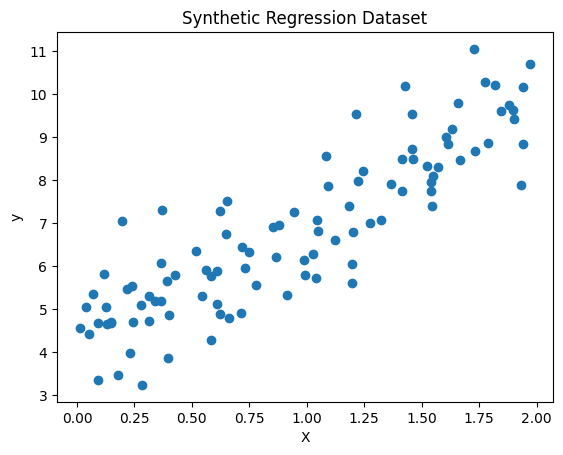

In [10]:
plt.scatter(X, y)
plt.title("Synthetic Regression Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


## Linear Regression (Baseline)


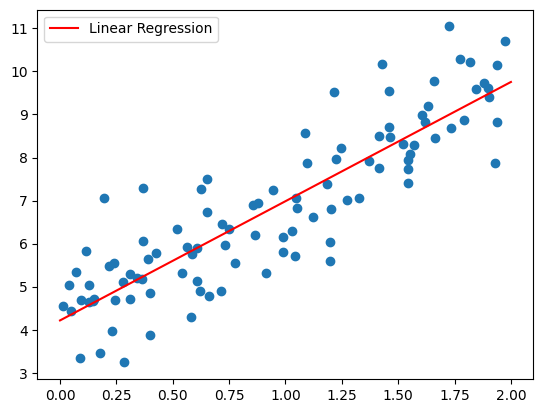

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

x_grid = np.linspace(0, 2, 200).reshape(-1, 1)
y_lin_pred = lin_reg.predict(x_grid)

plt.scatter(X, y)
plt.plot(x_grid, y_lin_pred, "r-", label="Linear Regression")
plt.legend()
plt.show()


## Interpretation

Linear regression minimizes MSE and penalizes all errors.


## Support Vector Regression


In [4]:
svr = SVR(kernel="linear", C=1.0, epsilon=0.5)
svr.fit(X, y.ravel())


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.5
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [12]:
y_svr_pred = svr.predict(x_grid)

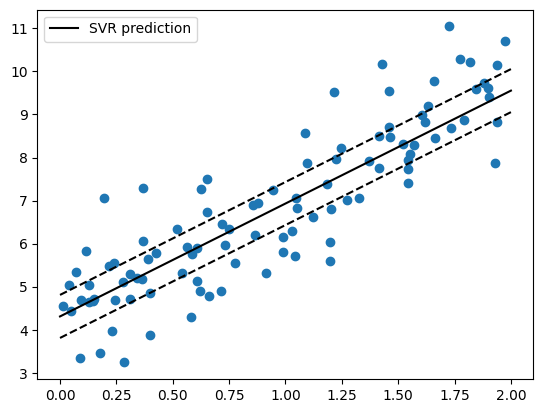

In [13]:
plt.scatter(X, y)
plt.plot(x_grid, y_svr_pred, "k-", label="SVR prediction")
plt.plot(x_grid, y_svr_pred + 0.5, "k--")
plt.plot(x_grid, y_svr_pred - 0.5, "k--")
plt.legend()
plt.show()


## Interpretation

The dashed lines represent the ε-tube.
Points inside the tube are not penalized.
Only points outside become support vectors.


In [14]:
len(svr.support_)

54

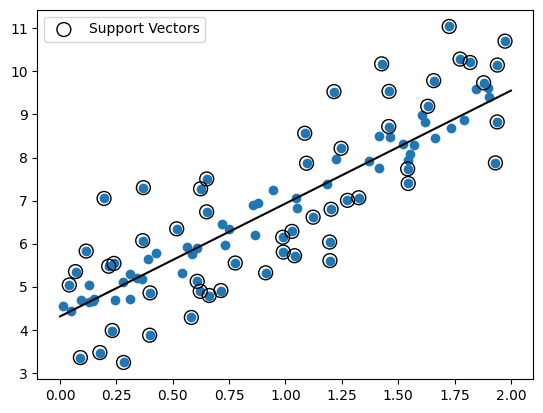

In [15]:
plt.scatter(X, y)
plt.scatter(
    X[svr.support_],
    y[svr.support_],
    facecolors="none",
    edgecolors="k",
    s=100,
    label="Support Vectors"
)
plt.plot(x_grid, y_svr_pred, "k-")
plt.legend()
plt.show()


## Effect of Epsilon


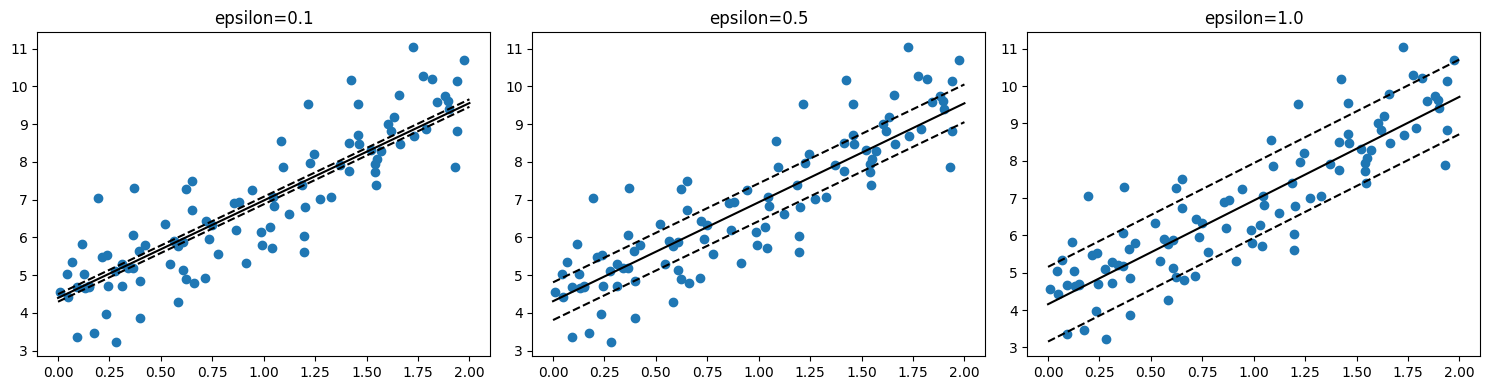

In [16]:
epsilons = [0.1, 0.5, 1.0]

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, eps in enumerate(epsilons):
    model = SVR(kernel="linear", C=1.0, epsilon=eps)
    model.fit(X, y.ravel())
    y_pred = model.predict(x_grid)

    axes[i].scatter(X, y)
    axes[i].plot(x_grid, y_pred, "k-")
    axes[i].plot(x_grid, y_pred + eps, "k--")
    axes[i].plot(x_grid, y_pred - eps, "k--")
    axes[i].set_title(f"epsilon={eps}")

plt.tight_layout()
plt.show()


## Interpretation

Smaller epsilon → More sensitive model (more support vectors)
Larger epsilon → More tolerant model (fewer support vectors)


## Effect of C


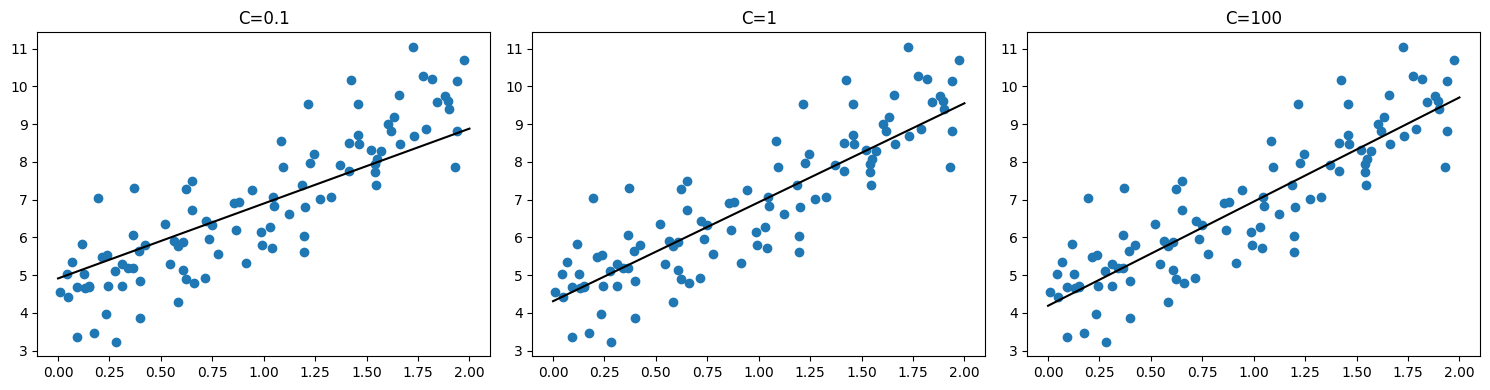

In [17]:
Cs = [0.1, 1, 100]

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, C in enumerate(Cs):
    model = SVR(kernel="linear", C=C, epsilon=0.5)
    model.fit(X, y.ravel())
    y_pred = model.predict(x_grid)

    axes[i].scatter(X, y)
    axes[i].plot(x_grid, y_pred, "k-")
    axes[i].set_title(f"C={C}")

plt.tight_layout()
plt.show()


## Interpretation

Small C → Wider margin, more bias
Large C → Fits data more closely, higher variance


## Comparison: SVR vs Linear Regression


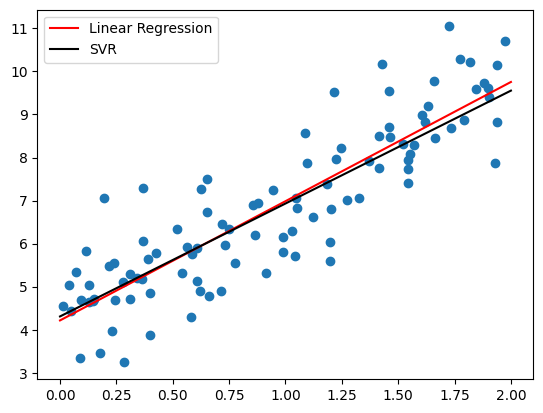

In [18]:
plt.scatter(X, y)
plt.plot(x_grid, y_lin_pred, "r-", label="Linear Regression")
plt.plot(x_grid, y_svr_pred, "k-", label="SVR")
plt.legend()
plt.show()


## Interpretation

SVR ignores small deviations and focuses only on large errors,
making it more robust to small noise.


## Key Takeaways

- SVR uses ε-insensitive loss
- Only points outside the ε-tube affect the model
- C controls penalty strength
- Epsilon controls tolerance to small errors
- SVR depends only on support vectors
